# Word embeddings

## Les inconvénients de la méthode sac de mots

Dans les cours précédents, nous avons utilisé la méthode du sac de mots afin d'encoder des données textuelles et de pouvoir les donner en entrée à nos algorithmes. Cette méthode à été une des premières utilisée dans le domaine du TAL et du Machine Learning. En encodant chaque token par leur fréquence d'apparition ou par leur poids par rapport aux documents du corpus (Tf-idf), cette méthode permet de constituer des vecteurs de mots, qui sont ensuite utilisés comme données d'entraînement à nos modèles.

Cependant, comme nous l'avons déjà vu, cette méthode d'encodage du texte et donc cette méthode de production des vecteurs posent plusieurs problèmes du point de vue informatique et linguistique:

* Pour chaque samples de notre dataset, on créé un vecteur dont le nombre de dimensions est égal à la taille de notre vocabulaire. Ces vecteurs sont donc généralement composés de plusieurs dizaines de millier de dimensions, ce qui est très coûteux en terme de calcul.

* De plus, pour chaque sample, seuls une très petite portion de notre vocabulaire y est présent. Ainsi, peut importe la méthode d'encodage que l'on choisit, le vecteur de mots sera essentiellement composé de zéros. L'essentielle des dimensions de notre vecteur ne sont donc pas pertinentes pour la compréhension du sample traité.

* Le sac de mot ne conserve aucune information sur la structure du texte ni la syntaxe de la phrase. Or, un même vocabulaire peut prendre un sens très différent selon l'ordre dans lequel il est utilisé. 

* La valeur que prend un mot dépend de son encodage, c'est-à-dire soit de son nombre d'occurrences dans le corpus, soit de son poids par rapport aux autres termes dans le document et dans le corpus. Ainsi, il n'a pas de vraie valeur sémantique.

Ainsi il est évident que la méthode sac de mots n'est pas suffisante si l'on souhaite améliorer les modèles existants ou réduire la puissance de calcul demandée.

In [ ]:
doc_1 = [0, 0, 10, ...]

## Word embedings

Les Words Embeddings sont très différents des sac de mots: Un Word Embeddings peut se comparer à un dictionnaire pour lequel chaque clé est un mot et chaque valeur est un vecteur représentant ce mot. La taille de ces vecteurs est de l'ordre de la centaine, et sont généralement constitués de 50, 100, 300 ou 500 dimensions, ce qui est extrêmement réduit par rapport au vecteur de vocabulaire du sac de mots. 

Ci-dessous, un exemple de faux Word Embbedings:

``
we = {
    "chat": [0.33, 0.5, 0.86, 0.77, 0.23],
    "le" : [0.21, 1, 0.93, 0.54, 0.64],
    "rat" : [0.96, 0.16, 0.98, 0.88, 0.26],
    "mange" : [0.63, 0.97, 0.4, 0.32, 0.43]
}
``

En utilisant la méthode de sac de mots, on encoderait la phrase ``Le chat mange le rat`` avec un vecteur de la taille du vocabulaire et dans lequel on indiquerait la présence (one-hot encoding) oule nombre d'occurrences de chaque mot. A l'inverse en encodant cette phrases avec des Word Embeddings, chaque mot serait représenté par le vecteur qui lui est associé:

``[
    [0.21, 1, 0.93, 0.54, 0.64], ==> le
    [0.33, 0.5, 0.86, 0.77, 0.23], ==> chat
    [0.63, 0.97, 0.4, 0.32, 0.43], ==> mange
    [0.21, 1, 0.93, 0.54, 0.64], ==> le
    [0.96, 0.16, 0.98, 0.88, 0.26] ==> rat
]``

### Note

Le terme Word Embedding fait référence au fait de représenter un mot sous forme de vecteur. Ainsi, un vecteur dans lequel on indique la fréquence d'apparition d'un mot dans un contexte donné ou bien son poids par rapport au corpus est un Word Embedding. Cependant, on distingue ces méthodes de celles où ces vecteurs sont appris de manière automatique et qui comporte une plus grande information sémantique: ce sont ces méthodes (Word2Vec, GloVe, fastText, ...) que l'on englobe communément dans le terme "Word Embeddings"

## Word2Vec

Le terme Word Embeddings est réellement devenu proéminent dans le domaine du TAL et du Machine Learning grâce l'algorithme ``Word2Vec``, développé par Mikolov et al (2013). A son apparition, Word2Vec a totalement chamboulé le domaine du TAL: en représentant les mots dans un espace vectorielle, il a permis de traiter l'aspect sémantique d'un vocabulaire. Ainsi, des performances jamais obtenues jusque là ont pu être atteinte, tandis que de nouveaux traitements linguistiques s'ouvraient.

<img src='data/img/wordemb.png'>


Ref: https://medium.com/@hari4om/word-embedding-d816f643140

<img src='data/img/wordemb2.png'>

## Sémantique, logique et mathématique

Un intérêt majeur de représenter le vocabulaire sous forme de vecteur est que cela permet de réaliser des opérations logiques au travers d'opérations mathématiques. 

### Calcul de similarité

Tout d'abord, cela permet pour un ou plusieurs mots donnés d'en trouver les plus similaires. Ci-dessous on peut voir que les mots "cat" et "kitten" sont très proches. Mathématiquement, on peut calculer la similarité entre ces deux vecteurs (donc deux mots) en calculant leur similarité cosinus.

<img src='data/img/cat_kitten.png'>

### Analogie

Un autre aspect très important des Word Embeddings est qu'il permet de traiter l'analogie entre différents termes. Ci-dessous une analogie très célèbre dans le contexte des Word Embeddings:

``Le mot 'homme' est au mot 'femme' ce que le mot 'roi' est au mot 'reine``

Comme on peut le voir sur l'image ci-dessous, la relation entre les points (man - woman) et (king - queen) sont similaires et situés relativement proches les uns des autres.

<img src='data/img/king_queen.png'>


Grâce aux vecteurs, on peut exprimer l'analogie ci-dessus de manière mathématique avec des additions et des soustractions:

`` (roi - homme) + femme = reine``

### CBOW et SkipGram

Contrairement aux travaux précédents, qui se basaient sur des matrices de co-occurrences de mots pour générer des vecteurs, Word2Vec consiste à entraîner un réseau de neurones à partir duquel on génère les vecteurs de mots. Le nombre de dimensions des vecteurs produits par cette méthode est de lors d'une à plusieurs centaines, ce qui est considérablement moins que les dizaines de millier de dimensions avec le sac de mots.

``Word2Vec`` se divise en deux méthodes opposées d'apprentissage: ``CBOW (Continuous Bag of Words)`` et ``SkipGram``. 

<img src="data/img/cbow_skipgram.png">


* CBOW: le modèle doit prédire un mot en ayant comme donnée d'entrée son contexte direct, qui est constitué d'une fenêtre plus ou moins grande de mots

<img src='data/img/bow.gif'>

* Skip-gram: Le modèle prend en entrée un mot et doit prédire son contexte. C'est l'opposé de CBOW.

<img src='data/img/skip.gif'>


Lors de l'entraînement, le modèle apprend des paramètres de manière itérative qui lui permette de prédire (correctement ou non) les mots cibles. Ce sont ces paramètres qui vont constituer les vecteus de mots, et ainsi, ce sont ces paramètres et pas tant le modèle en lui-même que l'on va conserver.

### Avantages et inconvénients de chaque méthode

* Skip-gram est plus adapté aux petits corpus. De plus, elle représente mieux les mots relativement peu fréquents dans le corpus. Cependant, son temps d'entraînement est très long.
* CBOW est plus adapté aux grands corpus. Il généralise mieux que Skip-gram, et représente donc mieux les mots plutôts fréquents. De plus, il est relativement rapide à entraîner. Cependant, il peut donner de mauvais résultats sur un corpus trop petit et les poids obtenus ne seront pas autant spécialisés qu'avec Skip-gram.


## Entraîner votre propre modèle

### Charger les données

Nous allons entraîner notre premier modèle sur la portion d'analyse de sentiments du ``amazon_reviews`` que nous avons sauvegardé précédemment. Cette portion se trouve dans le dossier ``data/multiclass`` de ce notebook.

In [1]:
import pandas as pd
df = pd.read_csv('data/multiclass/as_train.csv')
corpus = df.texts
corpus.head()

0    A déconseiller - Article n'a fonctionné qu'une...
1    Si vous voulez être déçu achetez le produit ! ...
2    Écran de mauvaise qualité, car il s'use en peu...
3    Cet engin ne sert à rien les sons sont pourris...
4    Très beau produit mais la grue n'a pas fonctio...
Name: texts, dtype: object

Gensim attend que les données d'entrées soit au minimum tokenizées. Pour l'exemple ci-dessous, nous nous contenterons de diviser les phrases au niveau des espaces, mais il est recommandé de prétraiter vos données de la même manière que précédemment, c'est à dire d'utiliser un vrai tokenizer, de supprimer les mots-vides, de transformer le texte en minuscule, etc.

In [3]:
!pip install spacy

  Using cached spacy-3.8.2.tar.gz (1.3 MB)
  Installing build dependencies ... |^C
anceled
ERROR: Operation cancelled by user


In [ ]:
!python -m spacy download fr_core_news_md

Traceback (most recent call last):
  File "/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/runpy.py", line 188, in _run_module_as_main
    mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
  File "/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/runpy.py", line 147, in _get_module_details
    return _get_module_details(pkg_main_name, error)
  File "/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/runpy.py", line 111, in _get_module_details
    __import__(pkg_name)
  File "/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/spacy/__init__.py", line 15, in <module>
    from .cli.info import info  # noqa: F401
  File "/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/spacy/cli/__init__.py", line 3, in <module>
    from ._util import app, setup_cli  # noqa: F401
  File "/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/spacy/cli/_util.py", line 9, in <module>
 

In [2]:
import spacy
nlp = spacy.load('fr_core_news_md')

In [5]:
corpus.sample(n=5)

165903    Ce shampoing est génial sur les démangeaisons,...
39866                                pas top , ne tiens pas
153183                   bébé a adorer et les parents aussi
67609     J' ai reçu parfait, mais très déçu de l' embal...
99354     Mon chat scotch plus le point que courir après...
Name: texts, dtype: object

## Tokenization du corpus

Pour entraîner des word embeddings avec gensim, il nous faut des listes de mots, donc des listes de listes de tokens

In [3]:
# la méthode sample() permet de retourner un nombre n aléatoire d'éléments
# la méthode pipe() de spaCy est adaptée au traitement de textes en séries. Attention, elle retourne un générateur ! 
docs = nlp.pipe(corpus.sample(n=10000))
train = [] # creer nouvelle liste qui servir de corpus tokenizé
for doc in docs:
    filtered_doc = [] # doc tokenizé
    for token in doc:
        if token.is_stop:
            pass
        elif token.is_punct:
            pass
        else:
            filtered_doc.append(token.lemma_) # si token est bon, on l'ajoute a la liste
            
    train.append(filtered_doc) # on ajoute le doc tokenizé au nouveau corpus
len(train)

10000

In [5]:
train[0]

['bonjour',
 'bien',
 'recevoir',
 'mini',
 'caméra',
 'rapidement',
 'décevoir',
 'conter',
 'aucun',
 'instruction',
 'mode',
 'emploi',
 'français',
 'colis',
 'utiliser',
 'mini',
 'caméra',
 'désirer',
 'recevoir',
 'rapidement',
 'instruction',
 'mode',
 'emploi',
 'français',
 'rapidement',
 'cordialement',
 'Alain',
 'L.']

## Gensim

``scikit-learn`` ne permet pas d'utiliser ou d'entraîner des Words Embeddings. Pour cela, nous allons utiliser ``gensim``, une librairie de TAL spécialisée dans les tâches non-supervisées (topic modelling, word embeddings, ...). 

Elle propose également une implémentation de Word2Vec ainsi que d'autres algorithmes similaires tels que GloVe et FastText (que nous présenterons plus tard). Elle sert également d'API permettant d'utiliser ces trois algorithmes de la même manière.

In [6]:
!pip install gensim

In [2]:
import gensim

In [7]:
from gensim.models import Word2Vec # on importe la classe Word2Vec
# taille du vecteur
vector_size = 100
# fenêtre de mots à considérer
window = 5
# fréquence minimale des mots
min_count = 1
# instancier le modèle déclence son entraînement
model = Word2Vec(sentences = train, vector_size=vector_size, window=window, min_count=min_count)

In [8]:
# l'attribut wv d'un modèle est un dictionnaire, où les clés sont des mots et les valeurs des vecteurs
# essayez d'afficher les vecteurs de différents mots que vous pouvez trouver dans le corpus
model.wv['bonjour']

array([-0.03473499,  0.44632208,  0.1482848 ,  0.08190036,  0.07465046,
       -0.97045463,  0.34732434,  1.1023365 , -0.5176048 , -0.40109256,
       -0.22640029, -0.7028501 , -0.01493011,  0.25821576,  0.24347872,
       -0.3005872 ,  0.02342757, -0.4515323 , -0.07384285, -1.0705047 ,
        0.35331982,  0.27706674,  0.19246796, -0.16411656, -0.26241982,
       -0.01240303, -0.32056674, -0.25792325, -0.38662362,  0.22222702,
        0.56269526,  0.09799735,  0.11915731, -0.42774218, -0.1676459 ,
        0.56870604,  0.00250886, -0.36351588, -0.16953474, -1.0148629 ,
        0.01471161, -0.34109825, -0.17887515,  0.0658382 ,  0.42643794,
       -0.22149226, -0.42570272, -0.18327008,  0.072961  ,  0.26109126,
        0.3046339 , -0.42328474, -0.1449249 , -0.01197041, -0.21890797,
        0.44642803,  0.333975  , -0.03412808, -0.39569175,  0.25096682,
        0.09888142,  0.03795445, -0.12884401,  0.00237228, -0.70740616,
        0.47387823,  0.24387296,  0.20495552, -0.4839449 ,  0.63

In [13]:
len(model.wv)

11612

In [14]:
# nos vecteurs ont bien 100 dimensions
model.wv['article'].shape

(100,)

## Trouver le mot le plus similaire

In [9]:
model.wv.most_similar('recommande', topn=10)

[('top', 0.9994215369224548),
 ('beau', 0.9992320537567139),
 ('cuir', 0.9991908073425293),
 ('intéressant', 0.9991759657859802),
 ('ensemble', 0.9991432428359985),
 ('confortable', 0.9991108775138855),
 ('fabrication', 0.9990907907485962),
 ('marque', 0.9990782737731934),
 ('agréable', 0.9990614056587219),
 ('moyen', 0.999027669429779)]

### Calculer la similarité entre deux mots

In [10]:
print("Distance 'article' - 'acheter' :", model.wv.similarity('article', 'acheter'))
print("Distance 'plastique' - 'bref' :", model.wv.similarity('plastique', 'bref'))

Distance 'article' - 'acheter' : 0.96522665
Distance 'plastique' - 'bref' : 0.9983813


### Calculer la similarité entre deux vecteurs

In [12]:
# on obtient des vecteurs
article = model.wv['article']
produit = model.wv['produit']
bref = model.wv['bref']

print("Distance 'article' - 'produit' :", model.wv.cosine_similarities(article, [produit]))
print("Distance 'article' - 'bref' :", model.wv.cosine_similarities(article, [bref]))
print("Distance 'article' - 'bref' :", model.wv.cosine_similarities(article, [bref, produit]))

Distance 'article' - 'produit' : [0.9795974]
Distance 'article' - 'bref' : [0.9787416]
Distance 'article' - 'bref' : [0.9787415 0.9795974]


### Identifier les mots les plus similaires

In [13]:
# identifie les mots les plus similaire d'un mot
model.wv.similar_by_word('article')

[('emballer', 0.998154878616333),
 ('emballage', 0.9968090653419495),
 ('envoi', 0.9956401586532593),
 ('retard', 0.995053768157959),
 ('respecter', 0.9949555993080139),
 ('rapidement', 0.9947947263717651),
 ('date', 0.9945918321609497),
 ('descriptif', 0.9943313598632812),
 ('livrer', 0.9941648840904236),
 ('réception', 0.9930657744407654)]

In [14]:
# identifie le mot le plus similaires de la liste par rapport
# a un autre mot
list_word = ['produit', 'Amazon', 'bref']
model.wv.most_similar_to_given('article', list_word)

'Amazon'

In [15]:
# identifie les mots les plus similaires en se basant sur deux listes:
# une liste positive et une liste négative
# retourne les mots les plus similaires à un champ lexical donné par la liste positive
# en faisant en sorte de s'éloigner du champ lexical des mots négatifs
pos = ['objet', 'produit']
neg = ['Amazon']
model.wv.most_similar(pos, neg)


[('photo', 0.9908233880996704),
 ('recommander', 0.9908043742179871),
 ('correct', 0.988135039806366),
 ('état', 0.9876464605331421),
 ('soigner', 0.9852531552314758),
 ('excellent', 0.9843165278434753),
 ('coqu', 0.9835519790649414),
 ('attente', 0.9834548830986023),
 ('correspondre', 0.9831746816635132),
 ('qualite', 0.9824206233024597)]

### Identifier un intrus 

In [16]:
list_word = ['article', 'bref', 'produit', 'objet']
model.wv.doesnt_match(list_word)

'produit'

### Identifier un mot plus proche

In [17]:
model.wv.closer_than('article', 'objet')

['bien',
 'recevoir',
 'recommander',
 'décevoir',
 'être',
 'rien',
 'temps',
 'arriver',
 'achat',
 'photo',
 'aucun',
 'parfait',
 'couleur',
 'vendeur',
 'non',
 'livrer',
 'commande',
 'attendre',
 'commander',
 'rapidement',
 'appareil',
 'super',
 'parfaitement',
 'emballage',
 'bonjour',
 'déçu',
 'Amazon',
 'beau',
 'boîte',
 'cadeau',
 'satisfait',
 'état',
 'souci',
 'boite',
 'prévoir',
 'carton',
 'délai',
 'Super',
 'remboursement',
 'envoyer',
 'emballer',
 'dire',
 'demande',
 'service',
 'content',
 'image',
 'retourner',
 'réception',
 'indiquer',
 'lettre',
 'complet',
 'répondre',
 'satisfaire',
 'souhaiter',
 'site',
 'conter',
 'dimension',
 'envoi',
 'amazon',
 'demander',
 'descriptif',
 'date',
 'surprise',
 'normal',
 'absolument',
 'annoncer',
 'contacter',
 'payer',
 'abîmer',
 'neuf',
 'impeccable',
 'vivement',
 'intéressant',
 'recu',
 'retard',
 'matériel',
 'client',
 'redire',
 'réponse',
 'vendre',
 'nickel',
 'magnifique',
 'ok',
 'respecter',
 'livr

### Sauvegarder le modèle sur le disque

In [ ]:
import os
savepath = 'data/w2v_model'

os.makedirs(savepath, exist_ok=True)

model.save(f"{savepath}/amazon_vec.wordvectors")

## Charger le modèle

In [21]:
from gensim.models import KeyedVectors
# dans gensim, la classe KeyedVectods permet de charger des modèles entraînés, en optimisant la mémoire
# l'option mmap='r' indique qu'on ne charge le modèle qu'en lecture seule, ce qui permet de ne charger que les poids
# du modèle. Cependant, on ne peut plus poursuivre l'entraînement. Pour cela, il faut charger le modèle entier
loaded_model = KeyedVectors.load('data/w2v_model/amazon_vec.wordvectors', mmap='r')
loaded_model

In [22]:
loaded_model.wv.closer_than('article', 'objet')

['bien',
 'recevoir',
 'recommander',
 'décevoir',
 'être',
 'rien',
 'temps',
 'arriver',
 'achat',
 'photo',
 'aucun',
 'parfait',
 'couleur',
 'vendeur',
 'non',
 'livrer',
 'commande',
 'attendre',
 'commander',
 'rapidement',
 'appareil',
 'super',
 'parfaitement',
 'emballage',
 'bonjour',
 'déçu',
 'Amazon',
 'beau',
 'boîte',
 'cadeau',
 'satisfait',
 'état',
 'souci',
 'boite',
 'prévoir',
 'carton',
 'délai',
 'Super',
 'remboursement',
 'envoyer',
 'emballer',
 'dire',
 'demande',
 'service',
 'content',
 'image',
 'retourner',
 'réception',
 'indiquer',
 'lettre',
 'complet',
 'répondre',
 'satisfaire',
 'souhaiter',
 'site',
 'conter',
 'dimension',
 'envoi',
 'amazon',
 'demander',
 'descriptif',
 'date',
 'surprise',
 'normal',
 'absolument',
 'annoncer',
 'contacter',
 'payer',
 'abîmer',
 'neuf',
 'impeccable',
 'vivement',
 'intéressant',
 'recu',
 'retard',
 'matériel',
 'client',
 'redire',
 'réponse',
 'vendre',
 'nickel',
 'magnifique',
 'ok',
 'respecter',
 'livr

## Visualiser des Word Embeddings

L'entraînement d'un modèle comme Word2Vec étant non-supervisé, il peut être utile de visualiser les résultats pour se rendre compte de la qualité. Cependant, les Word Embeddings ont certes bien moins de dimensions que les sacs de mots, il n'en reste pas moins qu'ils en comportent souvent plusieurs centaines. 

Ainsi, pour les visualiser, il est nécessaire de réduire le nombre de dimensions sans que cela n'en change la valeur. Pour cela, on peut faire appel à des techniques de réduction de dimensions telles que PCA.

In [23]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

# tous les embeddings
all_vectors = loaded_model.wv.vectors
# on compressera les vecteurs en 2 dimensions
pca = PCA(n_components=2)
results = pca.fit_transform(all_vectors)
results.shape

(11594, 2)

In [11]:
loaded_model.wv.index_to_key

['produit',
 'bien',
 'bon',
 'qualité',
 'petit',
 'recevoir',
 'prix',
 'trop',
 'recommander',
 'acheter',
 'faire',
 'fonctionner',
 'mettre',
 'décevoir',
 'utiliser',
 'vraiment',
 '2',
 'être',
 'rien',
 'temps',
 'utilisation',
 'pratique',
 'voir',
 'dommage',
 'article',
 'livraison',
 'conforme',
 'falloir',
 'arriver',
 'trouver',
 'photo',
 'fois',
 'jour',
 'grand',
 'achat',
 'joli',
 'facile',
 'l',
 'écran',
 'couleur',
 'parfait',
 'aucun',
 'taille',
 'beaucoup',
 'colis',
 'rapide',
 'rapport',
 '3',
 'mal',
 'téléphone',
 'mois',
 'contre',
 'non',
 'problème',
 'mauvais',
 'tenir',
 'commander',
 'cher',
 'prendre',
 'bout',
 'commande',
 'livre',
 'protection',
 'vendeur',
 'attendre',
 'vouloir',
 'passer',
 'super',
 'livrer',
 'description',
 'correspondre',
 'jamais',
 'devoir',
 'solide',
 '1',
 'bel',
 'aimer',
 'emballage',
 'impossible',
 'coque',
 'niveau',
 'plastique',
 'an',
 'coup',
 'parfaitement',
 'j',
 'appareil',
 'top',
 'attention',
 'rapideme

In [24]:
df = pd.DataFrame(results, columns=['x', 'y'], index = loaded_model.wv.index_to_key)
df

,x,y
bien,5.800580,-0.272412
produit,5.448835,-1.917950
bon,5.612134,-2.682191
qualité,5.532315,-3.493598
recevoir,5.421929,0.080824
...,...,...
Pantry,-0.433678,-0.020601
époux,-0.427491,-0.005643
Lent,-0.402986,-0.005086
filtrer,-0.429716,-0.004776


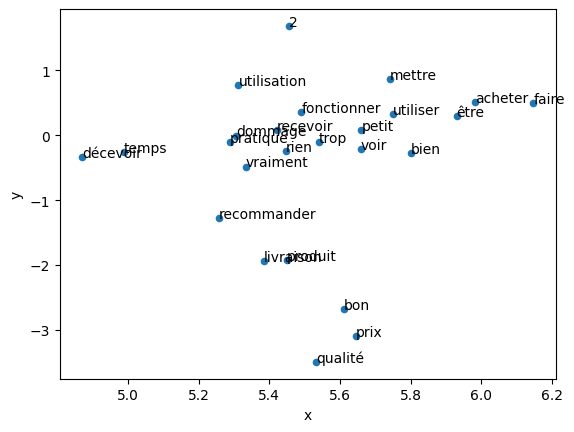

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots()

# on crée une matrice afin les valeurs de PCA, l'index correspond au vocabulaire du modèle
df = pd.DataFrame(results, columns=['x', 'y'], index = loaded_model.wv.index_to_key)
# on n'affiche que 25 mots
data = df.iloc[:25]

data.plot('x', 'y', kind='scatter', ax=ax)

for k, v in data.iterrows():
    ax.annotate(k, v)


# Encoder des documents avec gensim

In [26]:
import spacy 
nlp = spacy.load('fr_core_news_md')

In [27]:
df_train = pd.read_csv('data/multiclass/as_train.csv')
df_val = pd.read_csv('data/multiclass/as_dev.csv')
df_test = pd.read_csv('data/multiclass/as_test.csv')


In [48]:
df_train = df_train.sample(n=5000)
df_val = df_val.sample(n=100)
df_test = df_test.sample(n=100)

In [50]:

X_train, y_train = df_train['texts'], df_train['classes']
X_dev, y_dev = df_val['texts'], df_val['classes']
X_test, y_test = df_test['texts'], df_test['classes']

In [51]:
import numpy as np 

def encode_sentence(text, nlp, we_model):
    doc = nlp(text)
    tok_sent = [str(tok.text) for tok in doc]
    return we_model.wv.get_mean_vector(tok_sent)

encoded_X_train = np.array([encode_sentence(x, nlp=nlp, we_model=loaded_model) for x in X_train])
encoded_X_train.shape

(5000, 100)

In [52]:
from sklearn.linear_model import LogisticRegressionCV

logreg = LogisticRegressionCV()
logreg.fit(encoded_X_train, y_train)

/Users/ngutehrl/miniconda3/envs/cours/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ngutehrl/miniconda3/envs/cours/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

LogisticRegressionCV()

In [53]:
encoded_X_dev = np.array([encode_sentence(x, nlp=nlp, we_model=loaded_model) for x in X_dev])
encoded_X_test = np.array([encode_sentence(x, nlp=nlp, we_model=loaded_model) for x in X_test])
encoded_X_dev.shape, encoded_X_test.shape


((100, 100), (100, 100))

In [54]:
y_dev

2848    3
196     1
1367    2
73      1
3463    4
       ..
53      1
3591    4
3473    4
1547    2
2375    3
Name: classes, Length: 100, dtype: int64

In [47]:
len(pred_val)

100

In [57]:
from sklearn.metrics import classification_report

pred_val = logreg.predict(encoded_X_dev)
print(classification_report(y_dev, pred_val))

pred_test = logreg.predict(encoded_X_test)
print(classification_report(y_test, pred_test))


              precision    recall  f1-score   support

           1       0.55      0.58      0.56        19
           2       0.40      0.40      0.40        20
           3       0.29      0.25      0.27        20
           4       0.28      0.24      0.26        21
           5       0.40      0.50      0.44        20

    accuracy                           0.39       100
   macro avg       0.38      0.39      0.39       100
weighted avg       0.38      0.39      0.38       100

              precision    recall  f1-score   support

           1       0.48      0.57      0.52        21
           2       0.27      0.29      0.28        21
           3       0.21      0.31      0.25        16
           4       0.43      0.20      0.27        30
           5       0.07      0.08      0.07        12

    accuracy                           0.30       100
   macro avg       0.29      0.29      0.28       100
weighted avg       0.33      0.30      0.30       100



## Autres méthodes de Word Embeddings

### GloVe

GloVe est un algorithme créé par Penington et al en 2014 faisant suite à Word2Vec tout en étant très différent. Pour un corpus donné, GloVe constitue un vocabulaire ainsi qu'une liste de contexte. Il calcule ensuite la matrice de co-occurrences entre chaque mot du vocabulaire et un contexte donné. La taille du vocabulaire ainsi que des contextes possibles produisent une matrice gigantesque: GloVe utilise donc ensuite différentes méthodes pour réduire le nombre de dimensions de cette matrice, tout en conservant les informations produites.

Ainsi, GloVe se distingue de Word2Vec par deux aspects: tout d'abord il repose sur des méthodes statistiques et sur des matrices de co-occurrences plutôt que sur l'entraînement d'un réseau de neurones, et enfin les vecteurs produits ne sont pas de simple vecteurs one-hot, mais des vecteurs de co-occurrences mots-contexte, qui comportent beaucoup plus de valeur sémantique. Contrairement à Word2Vec, GloVe produit une matrice de co-occurrences pour l'ensemble du corpus, tandis que Word2Vec ne traite le contexte que sur une fenêtre donnée. Bien que produire cette matrice peut prendre du temps, l'opération n'est réalisée qu'une seule fois, contrairement à Word2Vec.

En cela, la méthode GloVe produit de meilleurs Word Embeddings et ce plus rapidement.

### Exemple de matrice de co-occurrences de mots

Ref : https://www.linkedin.com/pulse/word2vec-co-occurrence-words-shamane-siriwardhana/

<img src='data/img/coocc_matrix.jpeg'>



### fastText

Bien que Word2Vec et GloVe permettent de produire d'excellents Word Embeddings, ils ont en commun un défaut majeur: ils ne peuvent produire ou donner un vecteur d'un mot qui n'est pas contenu dans leur vocabulaire. En effet lors de l'entraînement, ces deux modèles constituent un vocabulaire pour lequel ils calculent les vecteurs associés à chaque mot. Cependant, si l'on devait utiliser un Word Embeddings produit de cette façon sur un corpus comportant de nouveaux mots, on ne pourrait obtenir les vecteurs pour ces mots: il faudra donc les ignorer. 

FastText est un algorithme produit par FAIR (Facebook's AI Research) en réponse à cette problématique en 2015. Il repose sur la même méthode que Word2Vec (plus précisémment la méthode Skip-gram). Cependant, contrairement à Word2Vec et GloVe, il ne constitue pas un vocabulaire par unité lexicale mais par sous-unités. Ainsi, au moment de produire le vecteur d'un mot, fastText produit déjà les vecteurs associés à chaque sous-unité composant ce nom, puis les combine. Ainsi pour chaque mot inconnu dans un nouveau corpus, fastText en produira un vecteur en le décomposant automatiquement en sous-unité qu'il connaît. 

### Exemple des sous-unités lexicales

Ref : https://amitness.com/2020/06/fasttext-embeddings/

<img src='data/img/fasttext.png'>

Un autre avantage énorme de fastText est que l'équipe de FAIR a déjà traité près de 300 langues différentes et a produit des Word Embedding pour chaque d'elle. Ceci vous permet donc d'accéder facilement aux Word Embeddings et de les incorporer à votre projet.

## Autres algorithmes de Word Embeddings

* ELMo
* Pointcare Embeddings
* Probabilistic FastText
* Doc2Vec 

## Utiliser des modèles pré-entraînés

De part l'utilisation de réseau de neurones, on considère que Word2Vec et les autres algorithmes similaires font partie du Deep Learning plutôt que du Machine Learning. Les réseaux de neurones ont permis de faire des progrès considérables dans le traitement des données. 

Cependant, ces progrès se sont fait au coût de modèles très lourds en terme d'espace disque et mémoire, mais aussi au coût de très nombreuses heures d'entraînement. 

Ainsi dans la communauté de Deep Learning, il est commun de partager son modèle une fois que celui-ci a terminé son entraînement et qu'il y a obtenu des résultats satisfaisants. Ceci est intéréssant pour différentes raisons:

* Tout d'abord, cela répond à la difficulté de trouver assez de données pour entraîner un modèle similaire. Si quelqu'un a entraîné un modèle sur un problème similaire au votre, il est logique d'utiliser son modèle plutôt que d'entraîner soi-même un modèle avec moins de données, au risque donc d'obtenir de moins bons résultats.

* Entraîner un bon réseau de neurones demande d'avoir une très grande quantité de données. Cependant, la puissance de calcul demandées pour traiter une telle masse de données est bien plus importante que pour les algorithmes en Machine Learning. Ainsi, peut d'ordinateur personnels sont en mesure d'entraîner de bons réseaux sans y passer des jours, voir des semaines. Utiliser un modèle pré-entraîné vous permet d'accéder à ces réseaux sans y invester à nouveau autant de temps.

* Un modèle pré-entraîné peut servir de base à votre nouveau modèle. En effet, de manière simpliste, les modèles en Deep Learning peut continuer à apprendre même lorsque leur entraînement est terminé. Ainsi, des modèles peuvent avoir été entraînés sur des données très générales (ex: Wikipédia). Ces modèles sont souvents très grands et ne sont pas très efficaces. Cependant, vous pouvez les utiliser et les affiner sur vos propres données, vous permettant ainsi d'obtenir de meilleurs résultats que si vous aviez créer un modèle depuis le début. On parle alors de **transfer learning**. Nous reviendrons plus tard sur ces notions

In [63]:
import gensim.downloader

# affichage des modèls pré-entrainés disponibles sur gensim
for x in list(gensim.downloader.info()['models'].keys()):
    print(x)

fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis


In [64]:
glove_twitter_25 = gensim.downloader.load('glove-twitter-25')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [65]:
glove_twitter_25.index_to_key

['<user>',
 '.',
 ':',
 'rt',
 ',',
 '<repeat>',
 '<hashtag>',
 '<number>',
 '<url>',
 '!',
 'i',
 'a',
 '"',
 'the',
 '?',
 'you',
 'to',
 '(',
 '<allcaps>',
 '<elong>',
 ')',
 'me',
 'de',
 '<smile>',
 '！',
 'que',
 'and',
 '。',
 '-',
 'my',
 'no',
 '、',
 'is',
 'it',
 '…',
 'in',
 'n',
 'for',
 '/',
 'of',
 'la',
 "'s",
 '*',
 'do',
 "n't",
 'that',
 'on',
 'y',
 "'",
 'e',
 'o',
 'u',
 'en',
 'this',
 'el',
 'so',
 'be',
 "'m",
 'with',
 'just',
 '>',
 'your',
 '^',
 'like',
 'have',
 'te',
 'at',
 '？',
 'love',
 'se',
 'are',
 '<',
 'm',
 'r',
 'if',
 'all',
 'b',
 '・',
 'not',
 'but',
 'we',
 'es',
 'ya',
 '&',
 'follow',
 'up',
 'what',
 'get',
 'lol',
 'un',
 '♥',
 'lo',
 'when',
 'was',
 '“',
 '”',
 'one',
 'por',
 'si',
 'out',
 '_',
 'mi',
 'can',
 '<sadface>',
 'من',
 '♡',
 '´',
 'he',
 'con',
 'they',
 'now',
 'go',
 '،',
 'para',
 'los',
 'know',
 'haha',
 'good',
 'tu',
 'back',
 '~',
 'about',
 'new',
 ';',
 'as',
 'day',
 'how',
 'who',
 'will',
 'want',
 'people',
 'y

# Apprentissage non-supervisé 

Les différents modèles que nous avons créés jusque là ont permis de catégoriser un texte comme positif ou négatif, ou bien d'identifier la variété d'une fleur en se basant sur différents critères. Ces différents projets ont en commun qu'ils correspondent à des problèmes de classification, et font donc partie de ce que l'on appelle l'apprentissage supervisé. Pour rappel, on parle d'apprentissage supervisé lorsque nos données d'entraînement sont annotées. Ces annotations permettent de contrôler la qualité de l'entraînement d'un modèle, en comparant le résultat prédis au véritable résultat attendu. 

Cependant, obtenir des données annotées pour entraîner un modèle n'est pas une chose si évidente: en effet, à moins d'accéder à un dataset comme ``amazon-reviews``, il vous faudra la plupart du temps collecter les données par vous-même. Or, ces données seront généralement sous forme brute, sans annotation. Annoter soi-même son propre corpus ou le faire faire par une équipe d'annotateur est une tâche à la fois laborieuse et coûteuse. Si en général il est admis que les performances et la vitesse de production des algorithmes de Machine Learning sont largement supérieurs aux modèles symboliques à base de règles, il ne faut pas oublier que cet avantage n'est possible que si l'on a déjà des données annotées.

Une solution au problème d'annotation est de faire appel à des méthodes non-supervisées, en particulier le ``clustering`` et le ``topic modelling``. Contrairement aux méthodes supervisées, celles-ci n'ont besoin que des données d'entrée et n'ont pas besoin d'annotation. De manière générale, ces algorithmes constituent des groupes à partir des données, en identifiant leurs points communs. Ainsi, bien que cela ne remplace pas une annotation faite par expert, les méthodes non-supervisées permettent d'annoter rapidement un jeu de données, en plus d'en offrir une nouvelle compréhension.

A nouveau, nous allons utiliser le amazon-reviews dataset, mais cette fois nous n'utiliserons que la colonne contenant les avis des utilisateurs:

In [58]:
import spacy 
nlp = spacy.load('fr_core_news_md')

In [59]:
import pandas as pd

df_train = pd.read_csv('data/multiclass/as_train.csv')
# df_dev = pd.read_csv('data/multiclass/as_dev.csv')
# df_test = pd.read_csv('data/multiclass/as_test.csv')

In [60]:
df_train

,texts,classes
0,A déconseiller - Article n'a fonctionné qu'une...,1
1,Si vous voulez être déçu achetez le produit ! ...,1
2,"Écran de mauvaise qualité, car il s'use en peu...",1
3,Cet engin ne sert à rien les sons sont pourris...,1
4,Très beau produit mais la grue n'a pas fonctio...,1
...,...,...
199995,Très jolies boucles! Très belle qualité ! Elle...,5
199996,Superbe. Ultra rapide. Tres bel écran. Il y a ...,5
199997,facile d'utilisation mais un peu lourd,5
199998,livré vite et bon produit,5


In [61]:
import numpy as np 

def encode_sentence(text, nlp, we_model):
    doc = nlp(text)
    tok_sent = [str(tok.text) for tok in doc]
    return we_model.wv.get_mean_vector(tok_sent)

sentences = df_train.sample(5000)['texts']
encoded_sentences = np.array([encode_sentence(x, nlp, loaded_model) for x in sentences])
encoded_sentences.shape

(5000, 100)

## Clustering

Le ``Clustering`` est un problème appartenant aux méthodes non-supervisées. Avant même de permettre d'annoter des données textuelles, il est avant tout utile pour comprendre les relations sous-jacentes aux données et en donner un nouvel aperçu. Il existe plusieurs méthodes de clustering, qui ont toutes en commun le même objectif: diviser les données en un certain nombre de groupes. Ces données sont groupées selon leur similarité, qui peut être calculée grâce à différentes méthodes comme la distance Euclidienne (distance entre deux points) ou la distance cosine. Une fois entraîné, le modèle peut associer un nouveau point de donnée à l'un de ses clusters.


Il existe de nombreux algorithmes de clustering, mais un des plus communs et efficaces est le ``K-Means Clustering``.

### K-means clustering


K-Means consiste à sélectionner au hasard K points de données. Le nombre K correspond au nombre de cluster que l'on souhaite obtenir. Ces points seront utilisés comme centre pour constituer les groupes, et sont appelés ``centroïdes``. L'algorithme déplace chaque centroïdes jusqu'à ce qu'il arrive à associer de manière optimale chaque groupe de données à un centroïde.

L'avantage majeur de cette méthode est qu'il très rapide et s'adapte bien à de grands datasets. A l'inverse, le choix de K se fait toujours de manière empirique, et peut demander plusieurs essais avant d'obtenir un résultat correct. Il est donc difficile de reproduire les résultats.

<img src='data/img/kmeans.gif'>



Scikit-learn propose différentes implémentations de K-Means Clustering, la principale étant nommée ``K-means``. Cependant, nous allons plutôt utiliser la classe ``MiniBatchKMeans``, qui est plus adaptée aux grand nombre de features. Cet algorithme traite les données par paquets ("batch") plutôt que dans son ensemble, ce qui augmente la vitesse de traitement, mais baisse les performances de manière très légères.

In [62]:
from sklearn.cluster import MiniBatchKMeans

mbkm = MiniBatchKMeans(n_clusters=20) # n_clusters indique le nombre de cluster
                                        # dans lesquels on regroupe les données
    
# on voit que les algorithmes de clustering sont des transformers dans scikit-learn
centers = mbkm.fit_transform(encoded_sentences)
# quand on transforme les données à l'aide d'un algorithme de clustering dans scikilearn
# on obtient un vecteur pour lequel chaque dimension indique la distance du point avec chaque centre
centers.shape, centers


((5000, 20),
 array([[0.06810081, 0.99489385, 0.23530841, ..., 0.12403316, 0.42350975,
         0.2491189 ],
        [0.06722382, 0.96331203, 0.21445604, ..., 0.09753488, 0.40810347,
         0.2773424 ],
        [0.11427623, 0.9841679 , 0.21856117, ..., 0.09252969, 0.41538817,
         0.2943999 ],
        ...,
        [0.12045692, 0.95287955, 0.14984652, ..., 0.03930517, 0.34665686,
         0.2777253 ],
        [0.15284473, 0.97282416, 0.22732207, ..., 0.13465868, 0.40550488,
         0.16929449],
        [0.12500364, 0.9487833 , 0.2084687 , ..., 0.10819453, 0.39459231,
         0.23489949]], dtype=float32))

In [95]:
# clustert_centers_ indique les coordonnées des centres de chaque clusters
centroids = mbkm.cluster_centers_
centroids.shape, centroids

((20, 100),
 array([[-0.01556498,  0.11463212,  0.02757389, ..., -0.09210289,
          0.02831122, -0.05425408],
        [-0.00788819,  0.10257241,  0.02755485, ..., -0.09670893,
          0.0270911 , -0.06146743],
        [ 0.00168473,  0.11417747, -0.01712512, ..., -0.10904438,
          0.03048586, -0.07072294],
        ...,
        [-0.00738379,  0.09991098,  0.03279126, ..., -0.0976866 ,
          0.02353786, -0.06403816],
        [ 0.00332601,  0.08847778,  0.02388868, ..., -0.08743328,
          0.03890602, -0.06551542],
        [-0.02904709,  0.06015659,  0.04583095, ..., -0.05873895,
          0.04760167, -0.04921833]], dtype=float32))

In [64]:
# on tente de predire a quel cluster un nouveau document appartient
first_doc = sentences.iloc[1000]
print("First doc :", first_doc)
vec_first_doc = np.array([encode_sentence(first_doc, nlp, loaded_model)])
pred = mbkm.predict(vec_first_doc)
print("First doc appartient au cluster :", pred[0])

First doc : Je recommande ce produit.
First doc appartient au cluster : 15


### Voir les documents les plus représentatifs d'un cluster

In [65]:
sent_clusters = mbkm.predict(encoded_sentences)
df_clusters = pd.DataFrame.from_dict({
        "text": sentences,
        "cluster": sent_clusters
    }
)
df_clusters

,text,cluster
92102,A évaluer lors d'un voyage,0
8843,Très déçu j’ai reçu le le colis en temps et en...,5
82739,"Cela fait un peu toc, et c est plus petit que ...",5
125210,Mieux que les ampoules d'origine sur une Trium...,9
160450,Acheté il y a un bon moment. Mis plusieurs foi...,8
...,...,...
92114,"Acheter en août, en décembre il ne reste plus ...",5
100309,"Produit correct, Dommage qu'on ne puisse pas a...",12
12270,"Bonjour, pour plusieurs raisons: le champ des ...",17
110838,"Très bon produit, dommage que le service livra...",8


In [67]:
df_clusters[df_clusters['cluster'] == 15]

,text,cluster
133546,"tres bon produit,suivre la notice.",15
134051,Usage pro. Très bon produit.,15
167921,je suis satisfait de cette housse elle épouse ...,15
151799,"Très bonne qualité, tout correspond à mes atte...",15
127245,"Faute de roulements, les poulies ne glissent p...",15
...,...,...
162393,Excellent rapport qualité prix. Plein de coule...,15
145618,bon produit mais éclairage est moyen,15
44921,pas de tres bonnes qualite,15
135857,Très bon éclairage; la partie basse de l'ampou...,15


## Evaluer et visualiser les groupes

Le fait de ne pas avoir de données annotées apporte une difficulté pour évaluer la qualité du modèle: en effet, sans classes pour comparer la prédiction d'un modèle, on ne peut pas savoir si un modèle de clustering a correctement groupé les données entre-elles. Ainsi, une des meilleurs façons d'évaluer un modèle de clustering est d'intervenir manuellement et d'observer soi-même ou à l'aide d'un expert les différents clusters. 

Une autre solution pouvant assister dans l'évaluation d'un modèle de clustering est de visualiser les clusters. Cela permet de voir rapidement si les documents, termes, ... similaires sont effectivement groupés ensemble et de comparer éventuellement avec d'autres données.

### Réduire le nombre de dimensions

Les données que nous avons ont plusieurs dizaines de millier de dimensions. Tel quel, on ne peut pas visualiser autant de dimensions: il nous faut donc une méthode pour réduire le nombre de dimensions à 2 ou 3, sans perde l'information que les vecteurs contiennent.

Il existe pour cela plusieurs algorithmes, les deux plus communs étant ``t-SNE`` et ``PCA``. Les transformations obtenues par t-SNE sont généralement meilleures, cependant c'est un algorithme très gourmand qui s'adapte mal à un grand nombre de dimensions, au contraire de PCA. Il est donc recommandé d'utiliser PCA pour une visualisation rapide des données, ou de réduire le nombre de dimensions avec PCA (à environ 50) puis d'utiliser t-SNE.

### Distribution des données

In [68]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_2D = PCA(n_components=2) # on indique le nombre de dimensions que l'on veut garder
X_2d = pca_2D.fit_transform(encoded_sentences) # on transforme les données

<Axes: xlabel='x', ylabel='y'>

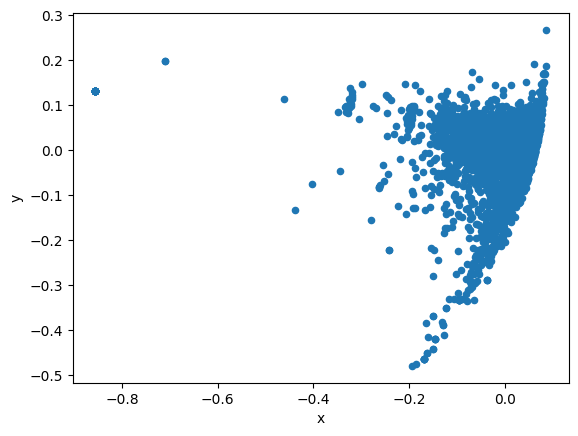

In [69]:
# visualisation avec pandas
df_X2d = pd.DataFrame(X_2d, columns=['x', 'y'])
labels = mbkm.labels_ # on utilise le cluster de chaque document comme index
df_X2d.index = labels

df_X2d.plot.scatter(x='x', y='y')

In [70]:
from matplotlib import cm
from matplotlib.colors import rgb2hex

# on veut visualiser a quel cluster chaque point appartient
# on doit donc associer chaque cluster (0, 1, 2, ...)
# a une couleur. On créé donc le mapping colormap pour lequel
# un clé est un cluster et une valeur une couleur au format
# hexadecimal

tab = cm.tab20
colormap = {i : rgb2hex(color) for i, color in enumerate(tab.colors)}


### Repartition des données et clusters

<Axes: xlabel='x', ylabel='y'>

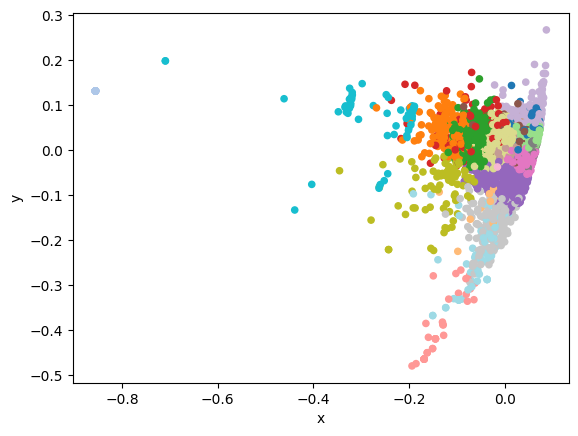

In [71]:
# on cree une colonne couleur dans laquelle chaque ligne est associe a une couleur
# par rapport a son index / son cluster
df_X2d['colors'] = [colormap[x] for x in df_X2d.index]
df_X2d.plot.scatter(x='x', y='y', c='colors')

### Répartition des données par cluster

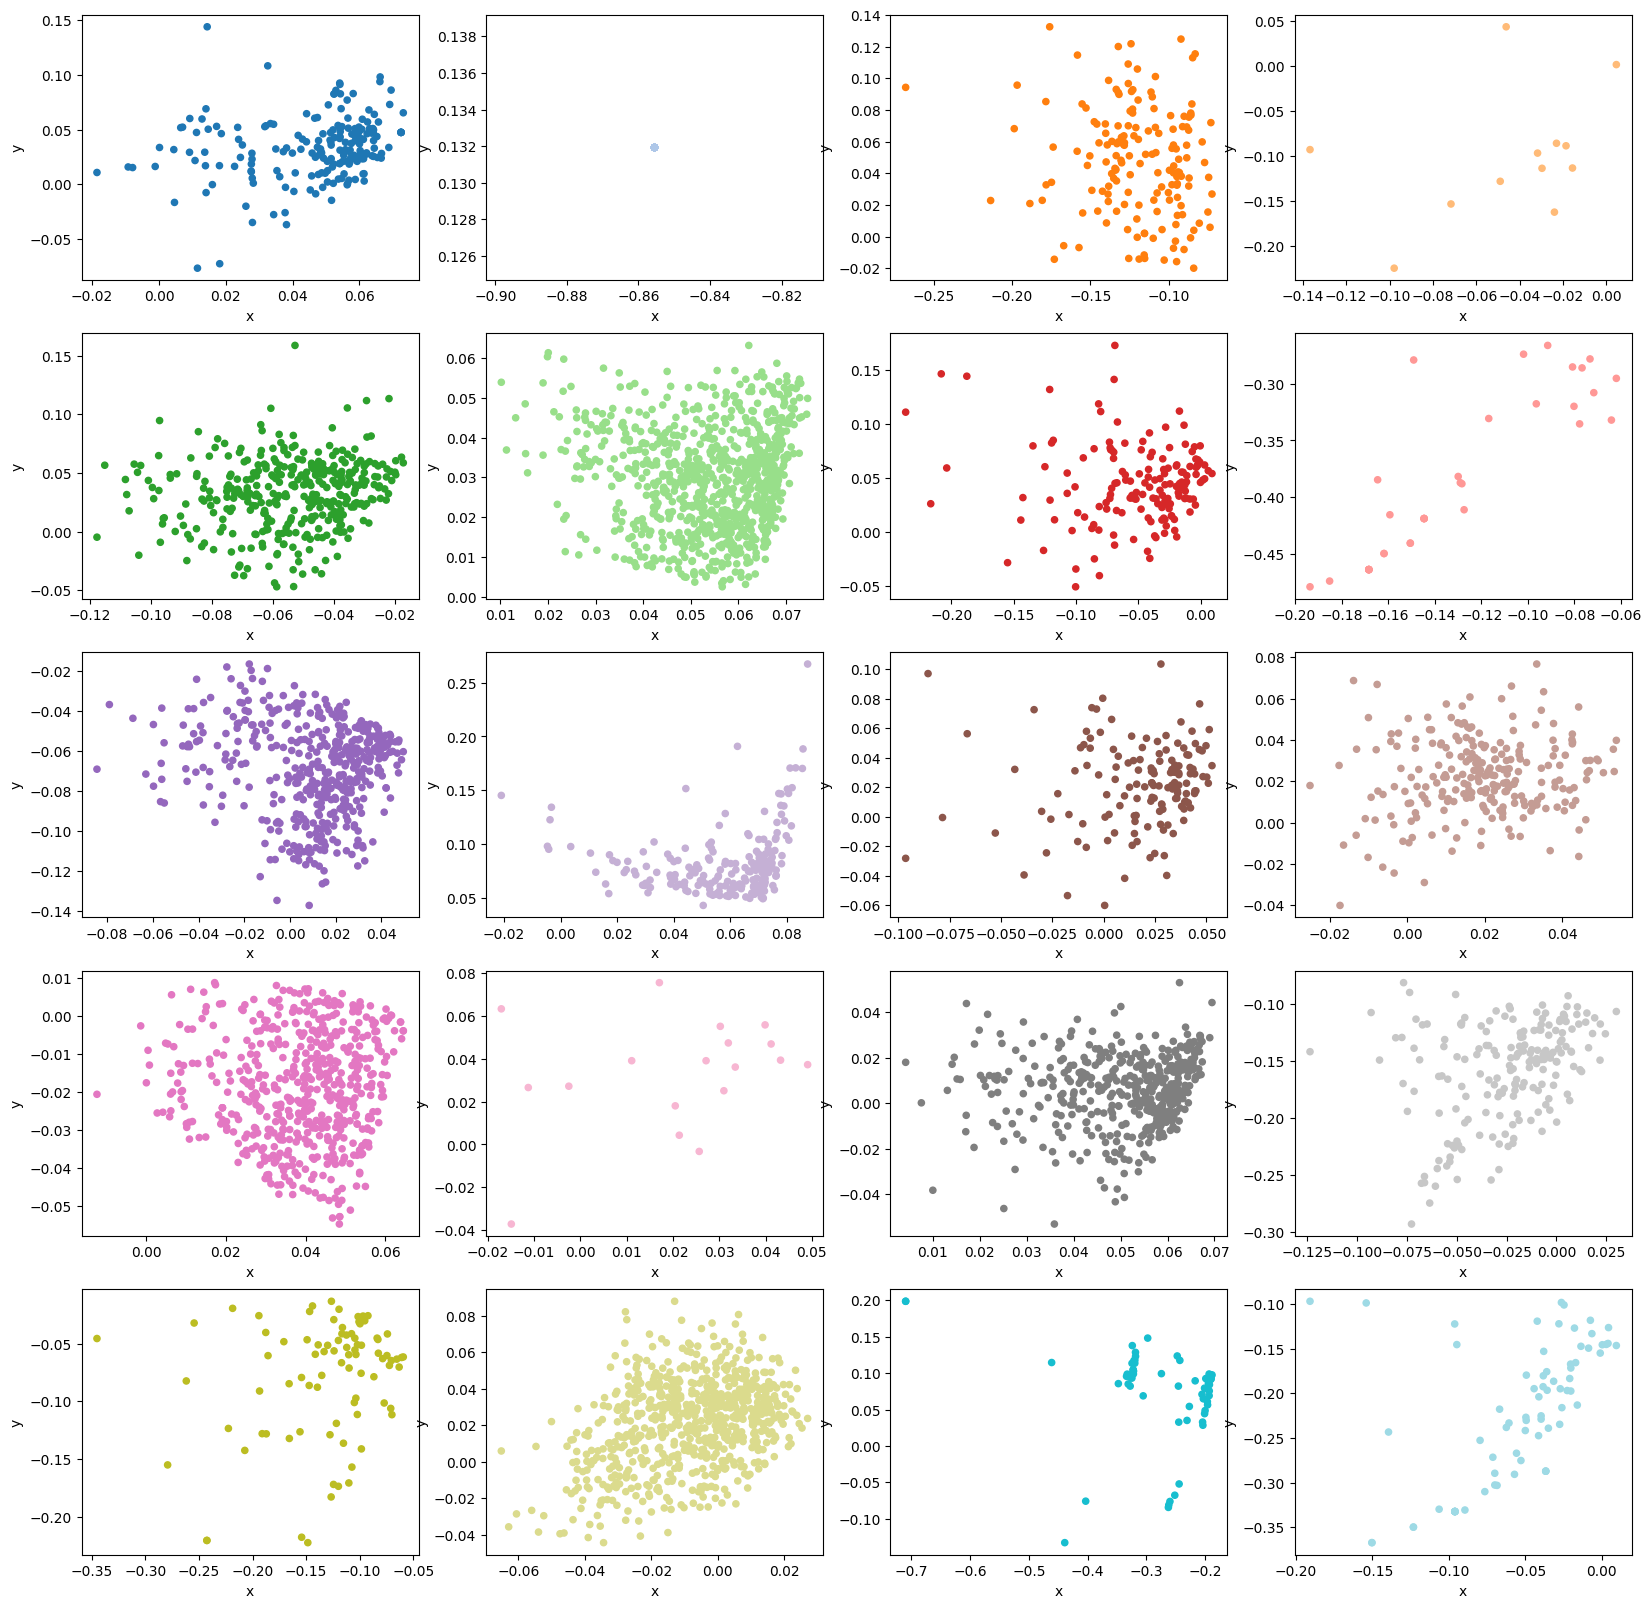

In [72]:
fig, axes = plt.subplots(5, 4, figsize=(20, 20)) # on fait un graphique de 5 par 4
for i, ax in enumerate(axes.reshape(-1)):
    cluster = df_X2d.loc[i]
    # on a eu un petit soucis avec les donnéés: certain cluster
    # n'ont qu'un seul point. On a donc des Series, avec lesquels
    # on ne peut pas faire de graphiques. On doit donc les
    # convertir en DataFrame
    
    if isinstance(cluster, pd.Series):
        dict_data = {"x" : cluster['x'],
                    "y" : cluster['y'],
                    'colors' : cluster['colors']}
        dataplot = pd.DataFrame(dict_data, index=[i])
    else:
        dataplot = cluster
    dataplot.plot.scatter(x='x', y='y', c='colors', ax = ax)

### Visualisation des centroïdes des clusters

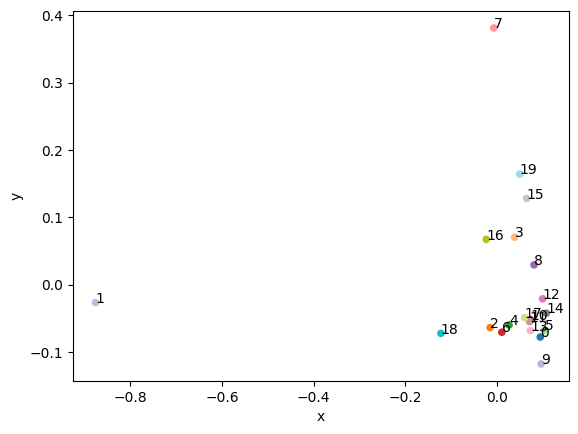

In [74]:
centroids = mbkm.cluster_centers_

centroids_2d = pca_2D.fit_transform(centroids)

fig, ax = plt.subplots()

df_centroids = pd.DataFrame(centroids_2d, columns=['x', 'y'],
                           index =  list(set(mbkm.labels_)))
colors = [colormap[x] for x in df_centroids.index]
df_centroids.plot.scatter(x='x', y='y', ax=ax, c=colors)

for k, v in df_centroids.iterrows():
    ax.annotate(k, v)

### Trouver le nombre optimal de clusters.

La méthode Elbow, qui permet de repérer le nombre de cluster idéal par rapport au dataset. On calcule l'inertie de chaque cluster (c'est à dire la somme au carré de la distance qui sépare chaque points de son centroïde), que l'on visualise ensuite par un graphique. Le nombre de cluster idéal est alors représenté par l'endroit qui ressemble à un coude (d'où le nom de méthode Elbow). Nous pouvons utiliser l'outil ``Yellowbrick``, qui proposent différents outils de visualisations, dont la méthode Elbow, sous le nom de ``KElbowVisualizer``, pour trouver ce coude.

In [91]:
!pip3 install yellowbrick

Ci-dessous, la ligne pointillée indique le nombre idéal de cluster:

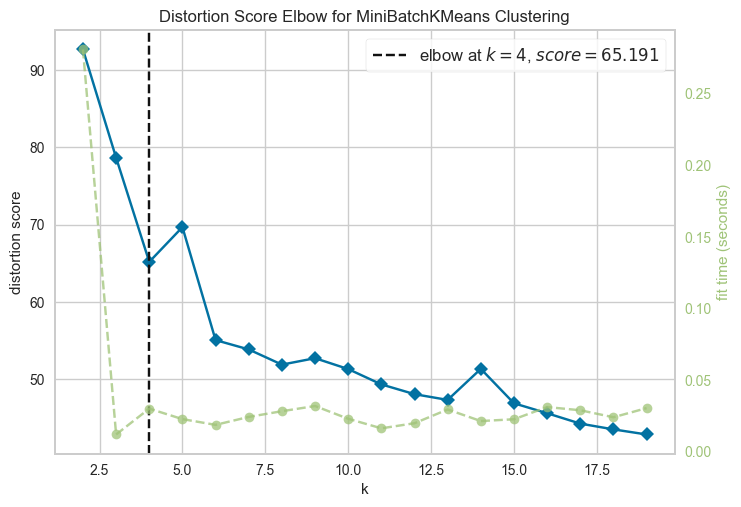

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [92]:
from yellowbrick.cluster import KElbowVisualizer

model = MiniBatchKMeans() # on initialise le modele que l'on va utiliser
# on instantie le visualisateur avec le model et le nombre k de cluster
# minimum et maximum que l'on veut essayer
visualizer = KElbowVisualizer(model, k=(2, 20)) 

visualizer.fit(encoded_sentences)
visualizer.show()

## Autres algorithmes de clustering

### Hierarchical Clustering

Hierarchical Clustering consiste à créér des clusters sous la forme d'un arbre plutôt que selon un centroïde.

Cet arbre peut être construit selon deux méthodes: ``agglomerative`` et ``divisive``. Dans la première
méthodes, les points sont associés pour former des clusters, qui sont ensuite associés entre eux également jusqu'à former un unique cluster qui englobe toutes les données. La seconde méthode est l'opposée de la première, où toutes les données sont regroupées dans un seul cluster qui est divisé en plusieurs sous-clusters.

Cette technique de clustering est visualisable grâce à un dendogramme:


<img src='data/img/hierarchical.png'>

### Distribution-based Clustering

Cette méthode se base sur la distribution des données. Un nombre K de centre de distribution est sélectionné. L'algorithme part du principe qu'il y a une distribution Gaussienne des données. Pour chacun de ces centres, on détermine la probabilité d'appartenance d'un point. Ainsi, plus un point est proche de ce centre et plus il est certain d'appartenir au groupe.

<img src='data/img/DistributionClustering.svg'>

### Density-based Clustering

Cette méthode consiste à identifier les zones denses de points. Ces zones forment des clusters, séparés par des zones blanches / vides. Les points situés dans cette zone blanche sont considérés comme du bruit. Les deux algorithmes principaux appliquant cette méthode sont DBSCAN et OPTICS.

<img src='data/img/DensityClustering.svg'>


### EM Clustering

La principale différence entre ces deux algorithmes est que les points ne peuvent appartenir qu'à un seul groupe dans K-Means, alors qu'ils peuvent appartenir à plusieurs dans EM Clustering. Plutôt que d'associer le point à un cluster, EM détermine pour chaque point la probabilité que celui-ci appartient à un cluster. EM Clustering est beaucoup plus lent que K-means, puisqu'il doit calculer les moyennes sur toutes les données plusieurs fois. Il n'est donc pas idéal pour des datasets massifs.

## Topic Modelling

Les méthodes de clustering sont très utiles pour identifier les points communs entre différents points de données et les regrouper ensemble. Si l'on est satisfait de la manière dont l'algorithme regroupe les données en cluster, on peut même s'en servir pour annoter nos données et constituer un dataset pour un problème de classification.

Cependant, à moins d'observer les données regroupées dans chaque cluster, l'algorithme ne nous dit rien sur le contenu de ces clusters, d'autant plus que ceux-ci sont "simplement" nommés selon un identifiant. Ainsi, du point de vue sémantique, les algorithmes de clustering ne nous apportent pas beaucoup d'informations.

Pour répondre à cette problématique, on peut utiliser les méthodes de ``topic modelling``. Contrairement au clustering qui cherche à grouper les données selon leurs similarités, le topic modelling tente d'identifier les thèmes principaux d'un corpus textuel. Il se réalise selon trois grandes méthodes:

* LDA (Latent Dirichlet Allocation)
* Latent Semantic Analysis (LSA)
* Non-Negative Matrix Factorization (NNMF)

Bien que scikit-learn implémente ces algorithmes, nous allons cette fois utiliser ``gensim`` pour entraîner notre algorithme. 

Avant de créer et d'entraîner notre modèle, il nous faut tout d'abord prétraiter nos données. Bien que nous l'ayons fait précédemment avec scikit-learn, nous allons reproduire les mêmes étapes ici à l'aide de gensim:

In [75]:
import pandas as pd

df_train = pd.read_csv('data/multiclass/as_train.csv')


In [76]:
nlp = spacy.load('fr_core_news_md')

In [77]:
sentences = df_train.sample(n=5000)['texts']
tokenized_sentences = []
for doc in nlp.pipe(sentences):
    # on ne conserve pas les mots vides
    tok_sent = [str(token.text) for token in doc if not token.is_stop]
    tokenized_sentences.append(tok_sent)
tokenized_sentences[0]

['utilise',
 'personnellement',
 'coup',
 'chaud',
 ',',
 'vraiment',
 'super',
 'puissant',
 ',',
 'portable',
 ',',
 'vraiment',
 'lourd',
 'tourne',
 'sens',
 'génial',
 '.',
 'utilise',
 'dormir',
 'chaud',
 'vitesse',
 '1',
 'rafraîchi',
 'silencieuse',
 '.',
 'recommande',
 'totalement',
 'produit',
 '!']

In [78]:
from gensim.corpora import Dictionary

# Dictionary constitue notre vocabulaire, associe un id a chaque token
# ainsi que différentes statistiques sur les documents du corpus
dictionary = Dictionary(tokenized_sentences)

In [79]:
# on convertit le dictionnaire (vocabulaire) en sac de mots (fréquences)à l'aide de la méthode doc2bow()
vec_corpus = [dictionary.doc2bow(doc) for doc in tokenized_sentences]

In [81]:
vec_corpus[0]

[(0, 1),
 (1, 3),
 (2, 2),
 (3, 1),
 (4, 2),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 2),
 (21, 1),
 (22, 2)]

### Latent Dirichlet Analysis (LDA)

In [82]:
# on peut désormais entrainer notre modèle
# celui ci prend en entrée le corpus vectorisé, le dictionnaire ainsi que
# le nombre de topic à identifier

from gensim.models.ldamodel import LdaModel
NUM_TOPICS = 20
lda = LdaModel(corpus=vec_corpus, num_topics=NUM_TOPICS, id2word=dictionary)

### Voir les topics

La méthode ``print_topics()`` permet de voir chaque topic, représenté par les mots les plus importants. Chaque mot y est associé avec son poids, qui indique son importance par rapport à ce topic:

In [83]:
lda.print_topics()

[(0,
  '0.094*"." + 0.038*"," + 0.023*"bien" + 0.023*"?" + 0.017*"reçu" + 0.014*"fonctionne" + 0.014*"..." + 0.010*"mois" + 0.008*"trop" + 0.008*"2"'),
 (1,
  '0.061*"." + 0.019*"+" + 0.018*"," + 0.012*"rien" + 0.011*"passe" + 0.010*"colis" + 0.009*"reçu" + 0.008*"sommes" + 0.007*"produit" + 0.006*"tomes"'),
 (2,
  '0.132*"." + 0.051*"," + 0.013*""" + 0.012*"bien" + 0.010*"faire" + 0.009*"livre" + 0.008*"produit" + 0.007*"bon" + 0.006*"3" + 0.006*"..."'),
 (3,
  '0.115*"," + 0.065*"." + 0.019*"bien" + 0.017*"(" + 0.016*")" + 0.016*"..." + 0.007*"produit" + 0.007*"prix" + 0.006*"utilisation" + 0.006*"beaucoup"'),
 (4,
  '0.038*"," + 0.021*"!" + 0.015*"." + 0.014*"qualité" + 0.009*"peinture" + 0.009*"Bonne" + 0.008*"passez" + 0.008*"tapis" + 0.008*"..." + 0.008*"chemin"'),
 (5,
  '0.032*"." + 0.022*"," + 0.019*"..." + 0.011*")" + 0.011*"trop" + 0.010*"bien" + 0.010*"(" + 0.010*"quantité" + 0.008*"air" + 0.007*"cher"'),
 (6,
  '0.038*"." + 0.038*"," + 0.018*"...." + 0.010*"!" + 0.010*"bie

### Prédire le topic d'un nouveau document

In [86]:
# on peut employer LDA comme un dictionnaire pour obtenir les topics auxquels un document appartient
# pour analyser un nouveau document, il faut lui appliquer les mêmes pré-traitements que ceux utilisés pour l'entraînement
# de LDA (donc Dictionary > BOW )
lda[vec_corpus[10]]

[(0, 0.26817787), (3, 0.3189191), (4, 0.32485768), (17, 0.055933572)]

## Références

* Présentation d'algorithmes de clustering:
    * https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68
    * https://machinelearningmastery.com/clustering-algorithms-with-python/
    * https://developers.google.com/machine-learning/clustering/clustering-algorithms
    
* Documentation Scikit-learn:
    * https://scikit-learn.org/stable/modules/clustering.html
    
* Comparaison PCA / t-SNE
    * https://towardsdatascience.com/dimensionality-reduction-for-data-visualization-pca-vs-tsne-vs-umap-be4aa7b1cb29
    * https://www.thekerneltrip.com/statistics/tsne-vs-pca/

* Yellowbrick
    * https://www.scikit-yb.org/en/latest/index.html

* Gensim
    * https://radimrehurek.com/gensim/
    

# Références

GloVe : https://nlp.stanford.edu/projects/glove/

fastText : https://fasttext.cc/

Gensim : 
* https://radimrehurek.com/gensim/models/doc2vec.html#gensim.models.doc2vec.Doc2Vec
* https://rare-technologies.com/word2vec-tutorial/
* https://radimrehurek.com/gensim/models/fasttext.html#gensim.models.fasttext.FastText
* https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py

Résumés des méthodes de Word Embeddings : http://hunterheidenreich.com/blog/intro-to-word-embeddings/

Post de blog sur la différence Word2Vec / fastText : https://amitness.com/2020/06/fasttext-embeddings/

https://iksinc.online/tag/continuous-bag-of-words-cbow/

https://towardsdatascience.com/nlp-101-word2vec-skip-gram-and-cbow-93512ee24314

https://www.analyticsvidhya.com/blog/2020/07/neural-networks-from-scratch-in-python-and-r/

https://towardsdatascience.com/understanding-neural-networks-19020b758230

http://jalammar.github.io/illustrated-word2vec/

https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/

https://kavita-ganesan.com/comparison-between-cbow-skipgram-subword/#.X0z4CxmxVhE